**5.	How many sets are typically played in a tennis match?**

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

Reading requierd tables

In [7]:
GameInfo = pd.read_csv( 'C:/Users/Maedeh/Desktop/TenisMatchPro/data/external/GameInfo.csv')

Creating a data frame which contains match_id and its number of sets played

In [3]:
matches = pd.DataFrame( GameInfo['match_id'].unique() , columns = ['match_id'])
matches['set_no'] = 0

Calculating the number of sets for each match

In [ ]:
for match in matches['match_id'] :
    matches['set_no'].loc[matches['match_id'] == match] = GameInfo['set_id'].loc[GameInfo['match_id'] == match].max()

Reporting

In [12]:
print( f'Tenis matches has typiccally {round(matches['set_no'].mean(),2)} sets')

Tenis matches has typiccally 2.3 sets


More analysis:

In [32]:
set_3 = round((matches[matches['set_no']==3].count() / matches['set_no'].count()).values[0], 2)
set_2 = round((matches[matches['set_no']==2].count()/ matches['set_no'].count()).values[0], 2)
print (f"{set_2} % of matches with 2 sets and {set_3}% with 3 sets")

0.69 % of matches with 2 sets and 0.29% with 3 sets


Plotting the histogram of number of sets in each match

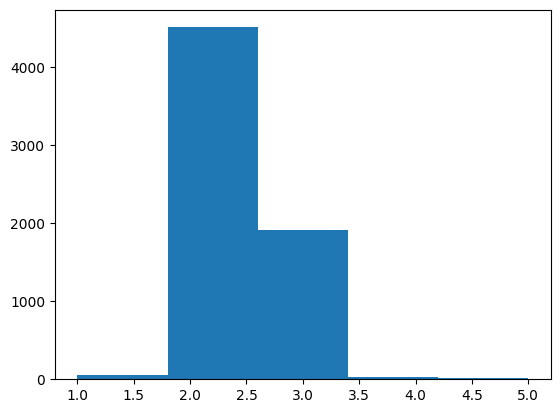

In [16]:
plt.hist(matches['set_no'] , bins =5)
plt.show()